In [1]:
# Import section

import tweepy
import pandas    as pd
import numpy     as np

# PLotar a visualizar os dados
from IPython.display       import display
import matplotlib.pyplot    as plt
import seaborn             as sns
%matplotlib inline


In [2]:
# Chave de acesso 
# Deveria estar em outro arquivo

# Cliente:
CONSUMER_KEY        = ''
CONSUMER_SECRET     = ''

# Acesso:
ACCESS_TOKEN        = ''
ACCESS_SECRET       = ''

In [3]:
# API
def twitter_setup():
    # Autenticação e acesso
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Retorna API com autenticação:
    api = tweepy.API(auth)
    return api

In [4]:
extractor = twitter_setup()

# Lista de perfis a terem dados extraídos
#tweets = extractor.user_timeline(screen_name="elonmusk", count=200)
# Lista de assuntos a serem extraídos
tweets = extractor.search(input("Topic you want to analyze: "), count=100)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Printa as tweets mais recentes
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Topic you want to analyze: bolsonaro
Number of tweets extracted: 99.

5 recent tweets:

RT @folha: Bolsonaro diz que dorme com arma do lado da cama no Palácio do Alvorada https://t.co/Vj5hAkGNbD

Bolsonaro diz não se lembrar de vizinho preso pelo assassinato de Marielle https://t.co/wuawEZxSwW

Detuvieron a los asesinos de Marielle Franco la compañera del PSOL. Marielle concejal, militante de izquierda y def… https://t.co/NdusGntVxy

@arthurhop10 @anterogreco Cara parece que está possuído. Ele está mais bravo pela repercussão negativa deste  iiníc… https://t.co/3duyVX4oz1

@Leo_rodr1 Vou mostrar essa ft pro Bolsonaro ae vc vai ver oq é bom😂😂😂



In [5]:
# criando tabela de dados
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Exibindo 5 primeiros elementos da tabela
# Para aumentar essa lista é só passar algum parametro em head()
display(data.head())


,Tweets
0,RT @folha: Bolsonaro diz que dorme com arma do...
1,Bolsonaro diz não se lembrar de vizinho preso ...
2,Detuvieron a los asesinos de Marielle Franco l...
3,@arthurhop10 @anterogreco Cara parece que está...
4,@Leo_rodr1 Vou mostrar essa ft pro Bolsonaro a...


In [6]:
# Exibe a lista de métodos que cada tweet contém em Tweepy
print(dir(tweets[0]))

print("\n")
# Exibe as informações de cada tweet
print(tweets[0].retweet_count)
print(tweets[0].retweeted)
print(tweets[0].text)
print(tweets[0].author.screen_name)
#print(tweets[0].retweets)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


20
False
RT @folha: Bolsonaro diz que dorme com arma do lado da cama no Palácio do Alvorada https://t.co/Vj5hAkGNbD
Francis666

In [7]:
# Adicionando outros dados à tabela de dados
data['Len']   = np.array([len(tweet.text) for tweet in tweets])
data['ID']    = np.array([(tweet.id) for tweet in tweets])
data['Date']  = np.array([(tweet.created_at) for tweet in tweets])
data['Likes'] = np.array([(tweet.favorite_count) for tweet in tweets])
data['RTs']   = np.array([(tweet.retweet_count) for tweet in tweets])
data['User']  = np.array([(tweet.author.screen_name) for tweet in tweets])

# Exibe 10 primeiros elementos da tabela
display(data.head(10))

,Tweets,Len,ID,Date,Likes,RTs,User
0,RT @folha: Bolsonaro diz que dorme com arma do...,106,1105884534271369221,2019-03-13 17:33:13,0,20,Francis66655170
1,Bolsonaro diz não se lembrar de vizinho preso ...,98,1105884534195847170,2019-03-13 17:33:13,0,0,mellwintter
2,Detuvieron a los asesinos de Marielle Franco l...,140,1105884532153171968,2019-03-13 17:33:13,0,0,JonatanGomezMST
3,@arthurhop10 @anterogreco Cara parece que está...,140,1105884531826016256,2019-03-13 17:33:13,0,0,adilsonb_
4,@Leo_rodr1 Vou mostrar essa ft pro Bolsonaro a...,70,1105884530840428544,2019-03-13 17:33:13,0,0,viniribeiro155
5,TNT se desculpa após mencionar Bolsonaro em di...,122,1105884530647461888,2019-03-13 17:33:13,0,0,MuellerJoao
6,"RT @Julieta100Romeo: ""agora vocês da esquerda ...",140,1105884529342992384,2019-03-13 17:33:12,0,31,balduinoxcx
7,"@kcestrabinho pera,só porque ele compartilhou ...",140,1105884529263284225,2019-03-13 17:33:12,0,0,CalebySimoes
8,RT @Reenlsober: Ou você apoia o Bolsonaro ou l...,124,1105884528164384768,2019-03-13 17:33:12,0,3008,kccimpacts
9,RT @turca123kordoba: -El asesino de Marielle v...,140,1105884528147685377,2019-03-13 17:33:12,0,69,Daniel22el


In [8]:
# Extraindo os tweets com mais likes e com mais RT

fav_max   = np.max(data['Likes'])
rt_max    = np.max(data['RTs'])

fav       = data[data.Likes == fav_max].index[0]
rt        = data[data.RTs == rt_max].index[0]

# Mais Liks:
print("O tweet com mais likes é: \n{}".format(data['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))

# Break line
print("\n")

# Mais RTs:
print("O tweet com mais RTs é: \n{}".format(data['Tweets'][rt]))
print("Número de RTs:: {}".format(rt_max))


O tweet com mais likes é: 
@zehdeabreu @joicehasselmann Que lixo.. ele vai pagar tanta indenização que depois vai chorar q foi a "ditadura" do… https://t.co/cAgP0V48rC
Número de likes: 1


O tweet com mais RTs é: 
RT @nicoIau: Todo mundo proximo do Bolsonaro é envolvido em milícias, menos ele. Incrível como esse homem consegue ser puro no meio de tant…
Número de RTs:: 11223


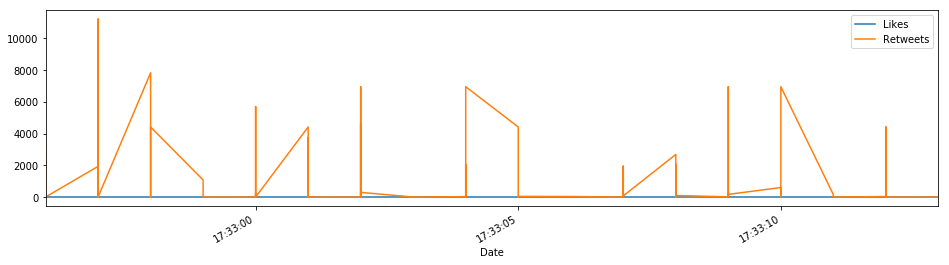

In [9]:
###         Criando um gráfico de tempo comparativo        ########
###       entre a quantidade de likes e retweets           ########


tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True)


In [10]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    # Remover links e caracteres especiais
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
def analize_sentiment(tweet):
    # Classificar a polaridade(positivo negativo) do tweet
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [11]:
# Adicionando mais uma coluna à tabela com os resultados obtidos acima
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])
display(data.head(10))

,Tweets,Len,ID,Date,Likes,RTs,User,SA
0,RT @folha: Bolsonaro diz que dorme com arma do...,106,1105884534271369221,2019-03-13 17:33:13,0,20,Francis66655170,0
1,Bolsonaro diz não se lembrar de vizinho preso ...,98,1105884534195847170,2019-03-13 17:33:13,0,0,mellwintter,0
2,Detuvieron a los asesinos de Marielle Franco l...,140,1105884532153171968,2019-03-13 17:33:13,0,0,JonatanGomezMST,0
3,@arthurhop10 @anterogreco Cara parece que está...,140,1105884531826016256,2019-03-13 17:33:13,0,0,adilsonb_,0
4,@Leo_rodr1 Vou mostrar essa ft pro Bolsonaro a...,70,1105884530840428544,2019-03-13 17:33:13,0,0,viniribeiro155,0
5,TNT se desculpa após mencionar Bolsonaro em di...,122,1105884530647461888,2019-03-13 17:33:13,0,0,MuellerJoao,0
6,"RT @Julieta100Romeo: ""agora vocês da esquerda ...",140,1105884529342992384,2019-03-13 17:33:12,0,31,balduinoxcx,0
7,"@kcestrabinho pera,só porque ele compartilhou ...",140,1105884529263284225,2019-03-13 17:33:12,0,0,CalebySimoes,0
8,RT @Reenlsober: Ou você apoia o Bolsonaro ou l...,124,1105884528164384768,2019-03-13 17:33:12,0,3008,kccimpacts,0
9,RT @turca123kordoba: -El asesino de Marielle v...,140,1105884528147685377,2019-03-13 17:33:12,0,69,Daniel22el,0


In [12]:
# Classificando os tweets
positive = [tweet for index, tweet in enumerate(data["Tweets"]) if data['SA'][index] > 0]
neutral  = [tweet for index, tweet in enumerate(data["Tweets"]) if data['SA'][index] == 0]
negative = [tweet for index, tweet in enumerate(data["Tweets"]) if data['SA'][index] < 0]

# Exibindo as porcentagens
print("Porcentagem de tweets positivos: {}%".format(len(positive)*100/len(data['Tweets'])))
print("Porcentagem de tweets neutros: {}%".format(len(neutral)*100/len(data['Tweets'])))
print("Porcentagem de tweets negativos: {}%".format(len(negative)*100/len(data['Tweets'])))


Porcentagem de tweets positivos: 4.040404040404041%
Porcentagem de tweets neutros: 94.94949494949495%
Porcentagem de tweets negativos: 1.0101010101010102%
